In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-beta0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.0
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])



array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid = train_test_split(housing.data,housing.target,random_state=7)


In [5]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)
x_valid_std = std.transform(x_valid)



In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()
histories = []
learning_rate = [1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
for lr in learning_rate:
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error",optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
    history = model.fit(x_train_std,y_train,validation_data=(x_valid_std,y_valid),
                        epochs=100,callbacks=callbacks)
    histories.append(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 15480 samples, validate on 5160 samples
Epoch 1/100
15480/15480 [==============================] - 0s 27us/sample - loss: 5.2770 - val_loss: 4.1793
Epoch 2/100
15480/15480 [==============================] - 0s 21us/sample - loss: 3.2675 - val_loss: 2.7914
Epoch 3/100
15480/15480 [==============================] - 0s 20us/sample - loss: 2.2437 - val_loss: 2.0267
Epoch 4/100
15480/15480 [==============================] - 0s 21us/sample - loss: 1.6686 - val_loss: 1.5691
Epoch 5/100
15480/15480 [==============

d:\python\lib\site-packages\tensorflow\python\keras\callbacks.py:1224: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


learning_rate: 0.0001
learning_rate: 0.0003
learning_rate: 0.001
learning_rate: 0.003
learning_rate: 0.01
learning_rate: 0.03


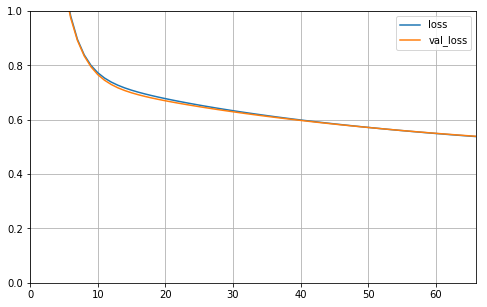

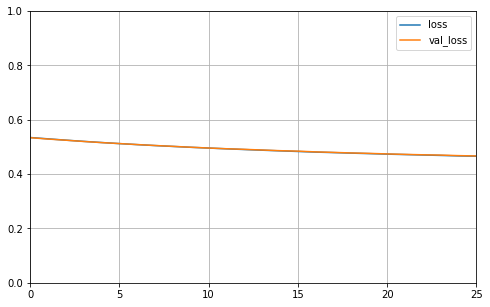

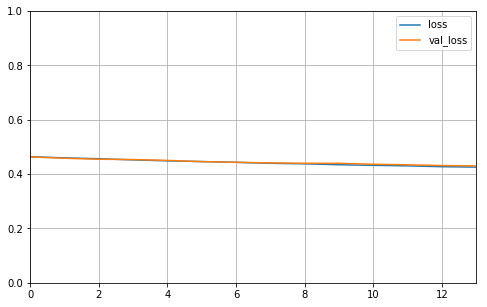

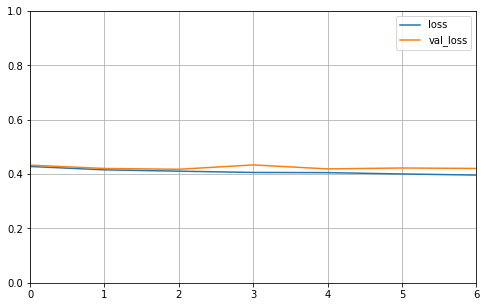

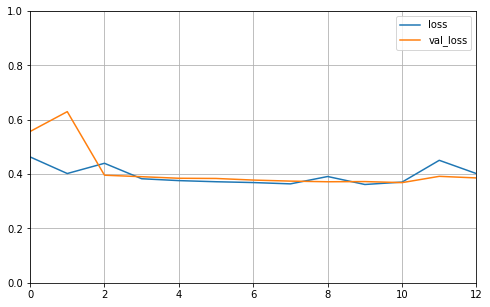

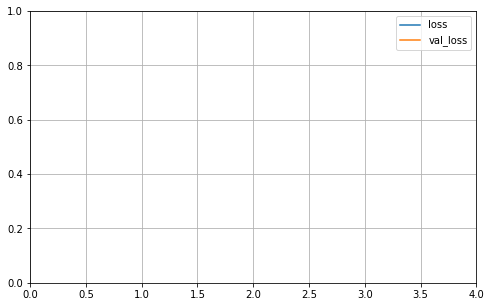

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
for lr,history in zip(learning_rate,histories):
    print("learning_rate:",lr)
    plot_learning_curves(history)

In [8]:
model.evaluate(x_test_std,y_test)



5160/5160 [==============================] - 0s 11us/sample - loss: nan


nan